In [54]:
import sys
import os
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from scipy.signal import detrend
from pathlib import Path

sys.path.append(os.path.expanduser('~/Documents/Weave'))
from Weave.utils import collapse_restore_multiindex

In [2]:
shap.initjs()

In [40]:
testpath = '/nobackup_1/users/straaten/shaptest_standard/7/-21/responsagg_separation.parquet'
inputpath = '/nobackup_1/users/straaten/spatcov/precursor.multiagg.parquet'
ypath =  '/nobackup_1/users/straaten/spatcov/response.multiagg.trended.parquet'
df = pd.read_parquet(testpath).sort_index(axis = 1)
df_in = pd.read_parquet(inputpath).loc[df.index.get_level_values('time'), (slice(None),slice(None),slice(None),-21,slice(None),'spatcov')].sort_index(axis = 1)
y = pd.read_parquet(ypath).loc[:,(slice(None),7,slice(None))].iloc[:,0]
y = y.reindex(df_in.index)
y = pd.Series(detrend(y), index = y.index, name = y.name) # Also here you see that detrending improves Random forest performance a bit
y = y > y.quantile(0.8)
# The ordering of the columns between these two is different. Perhaps because of pd.concat in the cross-validation, which does some matching of the non-concatenation axis

In [41]:
# Should I define some shapcore object?
def load_prepare_data():
    """
    Reads
    """

variable   siconc_nhmin                                                    \
timeagg              11                  15                  21             
lag                 -32                 -36                 -42             
separation          -21                 -21                 -21             
clustid               0         1         0         1         0         1   
metric          spatcov   spatcov   spatcov   spatcov   spatcov   spatcov   
time                                                                        
1981-06-01    -0.000572 -0.009737 -0.000858 -0.009225 -0.000141 -0.008526   
1981-06-02    -0.000451 -0.009344 -0.000805 -0.008957 -0.000159 -0.008423   
1981-06-03    -0.000376 -0.008948 -0.000746 -0.008643 -0.000169 -0.008326   
1981-06-04    -0.000180 -0.008501 -0.000639 -0.008284 -0.000183 -0.008190   
1981-06-05     0.000187 -0.008059 -0.000489 -0.007868 -0.000191 -0.008040   
...                 ...       ...       ...       ...       ...       ...   
2019-08-27    -0.006994 -0.005790 -0.001246 -0.008504 -0.001368 -0.015975   
2019-08-28    -0.006855 -0.005662 -0.001215 -0.008177 -0.001387 -0.015568   
2019-08-29    -0.006709 -0.005521 -0.001177 -0.007876 -0.001361 -0.015135   
2019-08-30    -0.006564 -0.005343 -0.001141 -0.007565 -0.001322 -0.014708   
2019-08-31    -0.006410 -0.005123 -0.001102 -0.007270 -0.001281 -0.014385   

variable                                 snowc_nhmin  ... transp_europe  \
timeagg           31                              3   ...            31   
lag              -52                             -24  ...           -52   
separation       -21                             -21  ...           -21   
clustid            0         1         2           0  ...             0   
metric       spatcov   spatcov   spatcov     spatcov  ...       spatcov   
time                                                  ...                 
1981-06-01  0.000246  0.001823 -0.001804    0.010737  ...  2.985431e-06   
1981-06-02  0.000253  0.001940 -0.001820    0.013695  ...  2.453708e-06   
1981-06-03  0.000261  0.002071 -0.001843    0.017514  ...  4.410213e-06   
1981-06-04  0.000271  0.002214 -0.001867    0.016045  ...  5.992192e-06   
1981-06-05  0.000279  0.002362 -0.001890    0.013555  ...  6.381308e-06   
...              ...       ...       ...         ...  ...           ...   
2019-08-27  0.002389 -0.007148  0.000238   -0.007237  ... -2.481443e-07   
2019-08-28  0.002397 -0.006598  0.000241   -0.008200  ... -6.359123e-07   
2019-08-29  0.002397 -0.006106  0.000243   -0.007987  ... -2.418079e-06   
2019-08-30  0.002393 -0.005743  0.000242   -0.007707  ... -3.414632e-06   
2019-08-31  0.002379 -0.005358  0.000244   -0.002767  ... -4.987931e-06   

variable                 z300_nhnorm                                           \
timeagg                           1         3         5         7          11   
lag                              -22       -24       -26       -28        -32   
separation                       -21       -21       -21       -21        -21   
clustid                1           0         0         0         0          0   
metric           spatcov     spatcov   spatcov   spatcov   spatcov    spatcov   
time                                                                            
1981-06-01  1.974174e-06   49.664886 -3.640584 -3.482409 -7.931938 -10.195770   
1981-06-02  2.032710e-06   66.057800 -1.847057 -3.470687 -7.909668  -9.474339   
1981-06-03  2.079100e-06   68.934563 -0.529348 -1.381757 -6.669040  -8.151914   
1981-06-04  2.110881e-06   50.757591  0.937225  2.185338 -4.061729 -10.526679   
1981-06-05  2.108661e-06   14.749125  2.935915  1.808133 -2.783260 -18.297203   
...                  ...         ...       ...       ...       ...        ...   
2019-08-27  1.480388e-06  -52.090950  0.776420  3.627255  8.243290 -57.172405   
2019-08-28  1.588692e-06  -37.904881  0.946684  2.583883  6.480862 -56.940704   
2019-08-29  1.285203e-06  -61.467098  0.933403 

In [4]:
_, names = collapse_restore_multiindex(df, axis = 1, ignore_level=['separation','lag','metric'], inplace = True) # Drop separation because single value

In [50]:
shap.force_plot(base_value = 0.2, shap_values=df.values[:100,:], features=df_in.values[:100,], feature_names=df.columns)

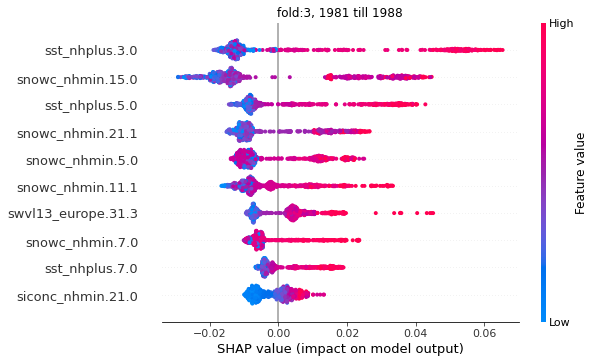

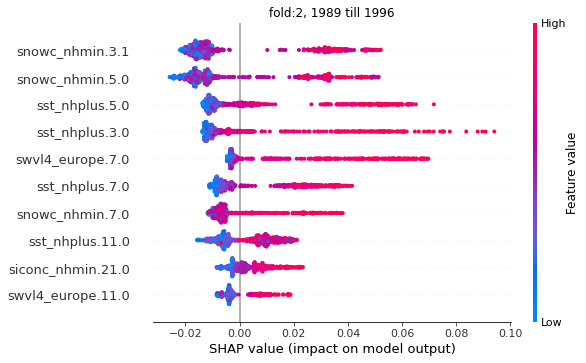

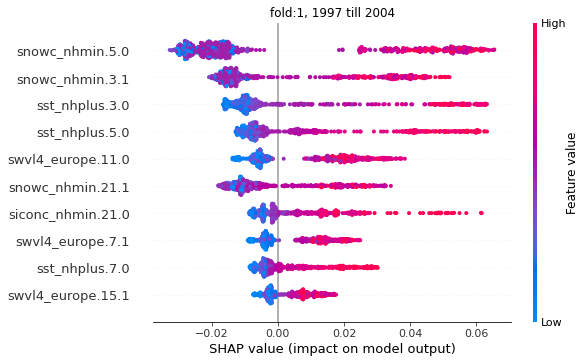

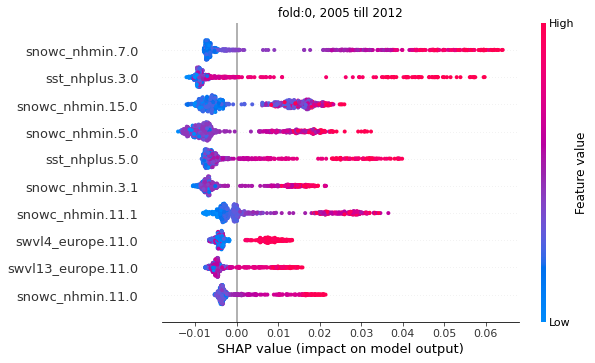

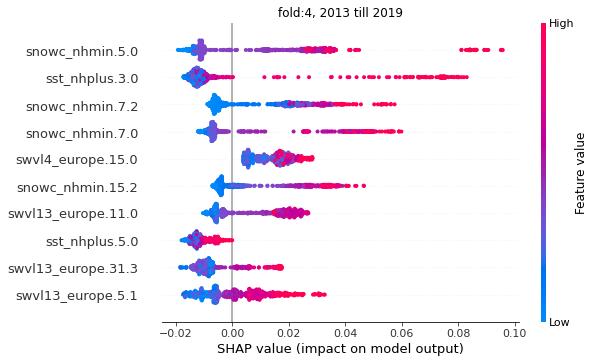

In [15]:
for fold in df.index.get_level_values('fold').unique():
    shapdata = df.loc[(fold,),:]
    pred_vals = df_in.loc[shapdata.index.get_level_values('time'),:]
    plt.title(f'fold:{fold}, {shapdata.index.year.min()} till {shapdata.index.year.max()}')
    shap.summary_plot(shap_values=shapdata.values, features=pred_vals.values, feature_names=shapdata.columns, max_display = 10)

This shows that over the different validation folds the relative ordering differs. Though some pop up in most.

indexing past lexsort depth may impact performance.


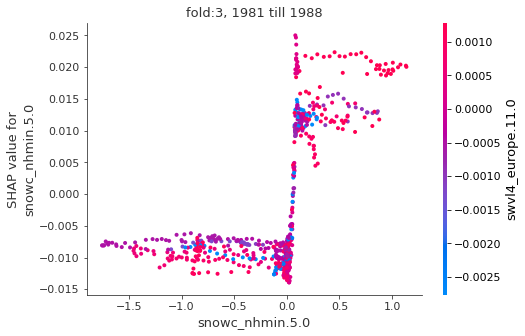

indexing past lexsort depth may impact performance.


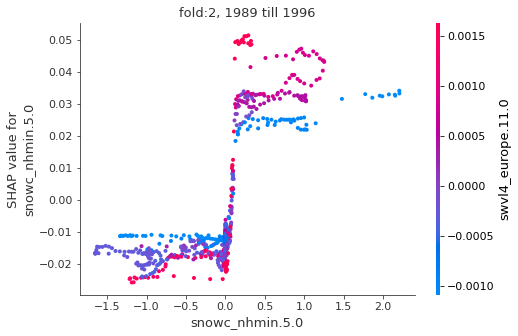

indexing past lexsort depth may impact performance.


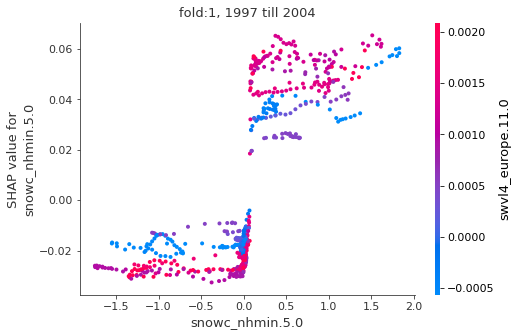

indexing past lexsort depth may impact performance.


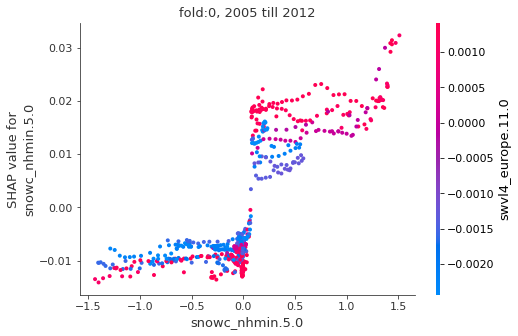

indexing past lexsort depth may impact performance.


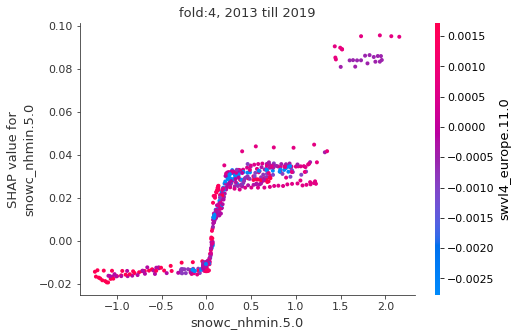

In [53]:
for fold in df.index.get_level_values('fold').unique():
    xvar = 'snowc_nhmin.5.0'
    colvar = 'swvl4_europe.11.0' #yvar is the shap values
    shapdata = df.loc[(fold,),:]
    pred_vals = df_in.loc[shapdata.index.get_level_values('time'),:]
    shap.dependence_plot(ind = xvar, interaction_index= colvar, shap_values=shapdata.values, features=pred_vals.values, feature_names=shapdata.columns, title = f'fold:{fold}, {shapdata.index.year.min()} till {shapdata.index.year.max()}')

Z300 influence on the thing is heightened (steeper slope) when the background sst conditions are suitable (red values), then the circulation pattern becomes decisive on whether probability is heightened or lowered.

Try to see shap differences over the folds.

In [18]:
shap_per_year = df.groupby(df.index.get_level_values('time').year).mean()
val_per_year = df_in.groupby(df_in.index.year).mean()

In [50]:
shap.force_plot(base_value = 0.2, shap_values=shap_per_year.values, features=val_per_year.values, feature_names=df.columns, ordering_keys=val_per_year.index)

<AxesSubplot:title={'center':'swvl4_europe.15.0 at -21 days'}, xlabel='time'>

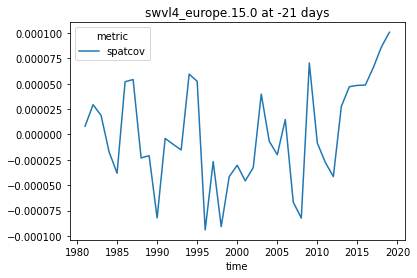

In [25]:
val_per_year[('swvl4_europe',15,-36,-21,0)].plot(title = 'swvl4_europe.15.0 at -21 days')
#val_per_year[('swvl4_europe',11,-32,-21,0)].plot()

<AxesSubplot:xlabel='time'>

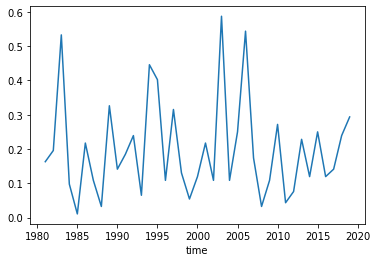

In [20]:
y.groupby(y.index.year).mean().plot()

In [47]:
hw_slice = slice(2024,2116)
hw_slice = 2024
shap.force_plot(base_value = 0.2, shap_values=df.values[hw_slice,:], features=df_in.values[hw_slice,], feature_names=df.columns)

### Make a plot for the last slice. 2013 till 2019. To see if train and test shaps differ.

In [42]:
testpath = '/nobackup_1/users/straaten/shaptest_standard/7/-21/responsagg_separation.parquet'
trainpath = '/nobackup_1/users/straaten/shaptest_standard_train/7/-21/responsagg_separation.parquet'
inputpath = '/nobackup_1/users/straaten/spatcov/precursor.multiagg.parquet'
df_test = pd.read_parquet(testpath).drop('expected_value', axis = 1).sort_index(axis = 1)
df_train = pd.read_parquet(trainpath).drop('expected_value', axis = 1).sort_index(axis = 1)
df_in = pd.read_parquet(inputpath).loc[df_test.index.get_level_values('time'), (slice(None),slice(None),slice(None),-21,slice(None),'spatcov')].sort_index(axis = 1)

dropping on a non-lexsorted multi-index without a level parameter may impact performance.


In [43]:
df_in

variable   siconc_nhmin                                                    \
timeagg              11                  15                  21             
lag                 -32                 -36                 -42             
separation          -21                 -21                 -21             
clustid               0         1         0         1         0         1   
metric          spatcov   spatcov   spatcov   spatcov   spatcov   spatcov   
time                                                                        
1981-06-01    -0.000572 -0.009737 -0.000858 -0.009225 -0.000141 -0.008526   
1981-06-02    -0.000451 -0.009344 -0.000805 -0.008957 -0.000159 -0.008423   
1981-06-03    -0.000376 -0.008948 -0.000746 -0.008643 -0.000169 -0.008326   
1981-06-04    -0.000180 -0.008501 -0.000639 -0.008284 -0.000183 -0.008190   
1981-06-05     0.000187 -0.008059 -0.000489 -0.007868 -0.000191 -0.008040   
...                 ...       ...       ...       ...       ...       ...   
2019-08-27    -0.006994 -0.005790 -0.001246 -0.008504 -0.001368 -0.015975   
2019-08-28    -0.006855 -0.005662 -0.001215 -0.008177 -0.001387 -0.015568   
2019-08-29    -0.006709 -0.005521 -0.001177 -0.007876 -0.001361 -0.015135   
2019-08-30    -0.006564 -0.005343 -0.001141 -0.007565 -0.001322 -0.014708   
2019-08-31    -0.006410 -0.005123 -0.001102 -0.007270 -0.001281 -0.014385   

variable                                 snowc_nhmin  ... transp_europe  \
timeagg           31                              3   ...            31   
lag              -52                             -24  ...           -52   
separation       -21                             -21  ...           -21   
clustid            0         1         2           0  ...             0   
metric       spatcov   spatcov   spatcov     spatcov  ...       spatcov   
time                                                  ...                 
1981-06-01  0.000246  0.001823 -0.001804    0.010737  ...  2.985431e-06   
1981-06-02  0.000253  0.001940 -0.001820    0.013695  ...  2.453708e-06   
1981-06-03  0.000261  0.002071 -0.001843    0.017514  ...  4.410213e-06   
1981-06-04  0.000271  0.002214 -0.001867    0.016045  ...  5.992192e-06   
1981-06-05  0.000279  0.002362 -0.001890    0.013555  ...  6.381308e-06   
...              ...       ...       ...         ...  ...           ...   
2019-08-27  0.002389 -0.007148  0.000238   -0.007237  ... -2.481443e-07   
2019-08-28  0.002397 -0.006598  0.000241   -0.008200  ... -6.359123e-07   
2019-08-29  0.002397 -0.006106  0.000243   -0.007987  ... -2.418079e-06   
2019-08-30  0.002393 -0.005743  0.000242   -0.007707  ... -3.414632e-06   
2019-08-31  0.002379 -0.005358  0.000244   -0.002767  ... -4.987931e-06   

variable                 z300_nhnorm                                           \
timeagg                           1         3         5         7          11   
lag                              -22       -24       -26       -28        -32   
separation                       -21       -21       -21       -21        -21   
clustid                1           0         0         0         0          0   
metric           spatcov     spatcov   spatcov   spatcov   spatcov    spatcov   
time                                                                            
1981-06-01  1.974174e-06   49.664886 -3.640584 -3.482409 -7.931938 -10.195770   
1981-06-02  2.032710e-06   66.057800 -1.847057 -3.470687 -7.909668  -9.474339   
1981-06-03  2.079100e-06   68.934563 -0.529348 -1.381757 -6.669040  -8.151914   
1981-06-04  2.110881e-06   50.757591  0.937225  2.185338 -4.061729 -10.526679   
1981-06-05  2.108661e-06   14.749125  2.935915  1.808133 -2.783260 -18.297203   
...                  ...         ...       ...       ...       ...        ...   
2019-08-27  1.480388e-06  -52.090950  0.776420  3.627255  8.243290 -57.172405   
2019-08-28  1.588692e-06  -37.904881  0.946684  2.583883  6.480862 -56.940704   
2019-08-29  1.285203e-06  -61.467098  0.933403 

indexing past lexsort depth may impact performance.
indexing past lexsort depth may impact performance.
indexing past lexsort depth may impact performance.


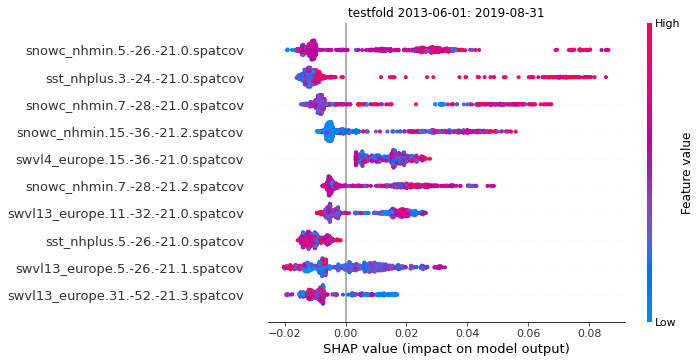

In [48]:
testfold = 4
tmin = df_test.loc[(testfold,)].index.min().strftime('%Y-%m-%d')
tmax = df_test.loc[(testfold,)].index.max().strftime('%Y-%m-%d')
testdata = df_test.loc[(testfold,),:].sort_index(axis = 1)
collapse_restore_multiindex(testdata,axis = 1, inplace = True)
plt.title(f'testfold {tmin}: {tmax}')
shap.summary_plot(shap_values=testdata.values, features= df_in.loc[testdata.index.get_level_values('time'),:].values, feature_names=testdata.columns, max_display = 10)


In [53]:
df_test.loc[(testfold,),:].

indexing past lexsort depth may impact performance.


variable   siconc_nhmin                                                    \
timeagg              11                  15                  21             
lag                 -32                 -36                 -42             
separation          -21                 -21                 -21             
clustid               0         1         0         1         0         1   
metric          spatcov   spatcov   spatcov   spatcov   spatcov   spatcov   
time                                                                        
2013-06-01    -0.001976  0.000244  0.002834 -0.000535 -0.002845  0.000267   
2013-06-02    -0.001817  0.000101  0.003085 -0.000529 -0.002840  0.000125   
2013-06-03    -0.001063 -0.000025  0.002597 -0.000253 -0.002716  0.000069   
2013-06-04    -0.001351 -0.000075  0.002123 -0.000238 -0.002707  0.000094   
2013-06-05    -0.000658 -0.000221  0.000750 -0.000323 -0.002653  0.000120   
...                 ...       ...       ...       ...       ...       ...   
2019-08-27    -0.002923 -0.000344 -0.001590 -0.000171 -0.004082  0.002737   
2019-08-28    -0.002910 -0.000254 -0.001476 -0.000458 -0.004044  0.002594   
2019-08-29    -0.002974 -0.000275 -0.001415 -0.000464 -0.004020  0.002726   
2019-08-30    -0.002832 -0.000322 -0.001399 -0.000472 -0.004040  0.002681   
2019-08-31    -0.002827 -0.000282 -0.001414 -0.000490 -0.004003  0.002620   

variable                                 snowc_nhmin  ... transp_europe  \
timeagg           31                              11  ...            31   
lag              -52                             -32  ...           -52   
separation       -21                             -21  ...           -21   
clustid            0         1         2           0  ...             0   
metric       spatcov   spatcov   spatcov     spatcov  ...       spatcov   
time                                                  ...                 
2013-06-01 -0.000159 -0.001267  0.000519   -0.002313  ...     -0.001397   
2013-06-02 -0.000249 -0.001071  0.000615   -0.002206  ...     -0.001262   
2013-06-03 -0.000333 -0.000771  0.001057   -0.002259  ...     -0.001082   
2013-06-04 -0.000383 -0.000638  0.001159   -0.002224  ...     -0.001034   
2013-06-05 -0.000423 -0.000506  0.001146   -0.002578  ...     -0.000800   
...              ...       ...       ...         ...  ...           ...   
2019-08-27  0.006383 -0.000048  0.000274   -0.003349  ...      0.000097   
2019-08-28  0.006500 -0.000249  0.000316   -0.003342  ...      0.000100   
2019-08-29  0.006397 -0.000227  0.000344   -0.003480  ...      0.000101   
2019-08-30  0.006571 -0.000246  0.000355   -0.003508  ...      0.000075   
2019-08-31  0.006272 -0.000244  0.000355   -0.003503  ...      0.000077   

variable             z300_nhnorm                                          \
timeagg                        1        11        15        21         3   
lag                          -22       -32       -36       -42       -24   
separation                   -21       -21       -21       -21       -21   
clustid            1           0         0         0         0         0   
metric       spatcov     spatcov   spatcov   spatcov   spatcov   spatcov   
time                                                                       
2013-06-01 -0.000111    0.001384 -0.003884  0.009577 -0.000255 -0.000156   
2013-06-02 -0.000126    0.002568 -0.003904  0.007954 -0.000134 -0.000134   
2013-06-03 -0.000100    0.002448 -0.003482  0.007844 -0.000173  0.000210   
2013-06-04 -0.000096    0.001237 -0.003474  0.006395 -0.000186  0.000029   
2013-06-05 -0.000102   -0.000902 -0.003502  0.001424 -0.000227 -0.000161   
...              ...         ...       ...       ...       ...       ...   
2019-08-27  0.000153   -0.001352 -0.005548 -0.002998 -0.000383 -0.000261   
2019-08-28  0.000143   -0.001299 -0.005564 -0.003023 -0.000388 -0.000199   
2019-08-29  0.000161   -0.001363 -0.005291 -0.003017 -0.000382 -0.000203   
2019-08-30  0.000095   -0.001665 -0.005222 -0.

In [44]:
df_in.loc[testdata.index.get_level_values('time'),:]

variable   siconc_nhmin                                                    \
timeagg              11                  15                  21             
lag                 -32                 -36                 -42             
separation          -21                 -21                 -21             
clustid               0         1         0         1         0         1   
metric          spatcov   spatcov   spatcov   spatcov   spatcov   spatcov   
time                                                                        
2013-06-01     0.000603  0.003479  0.001846 -0.001867 -0.000457 -0.003527   
2013-06-02     0.000612  0.003243  0.001773 -0.002114 -0.000483 -0.003802   
2013-06-03     0.000624  0.003098  0.001692 -0.002358 -0.000512 -0.004097   
2013-06-04     0.000591  0.002929  0.001582 -0.002564 -0.000558 -0.004301   
2013-06-05     0.000625  0.002745  0.001468 -0.002713 -0.000610 -0.004587   
...                 ...       ...       ...       ...       ...       ...   
2019-08-27    -0.006994 -0.005790 -0.001246 -0.008504 -0.001368 -0.015975   
2019-08-28    -0.006855 -0.005662 -0.001215 -0.008177 -0.001387 -0.015568   
2019-08-29    -0.006709 -0.005521 -0.001177 -0.007876 -0.001361 -0.015135   
2019-08-30    -0.006564 -0.005343 -0.001141 -0.007565 -0.001322 -0.014708   
2019-08-31    -0.006410 -0.005123 -0.001102 -0.007270 -0.001281 -0.014385   

variable                                 snowc_nhmin  ... transp_europe  \
timeagg           31                              3   ...            31   
lag              -52                             -24  ...           -52   
separation       -21                             -21  ...           -21   
clustid            0         1         2           0  ...             0   
metric       spatcov   spatcov   spatcov     spatcov  ...       spatcov   
time                                                  ...                 
2013-06-01  0.000049 -0.003222  0.000742    0.008557  ... -1.149662e-05   
2013-06-02  0.000063 -0.003431  0.000762    0.008858  ... -1.205508e-05   
2013-06-03  0.000075 -0.003670  0.000784    0.010366  ... -1.361663e-05   
2013-06-04  0.000080 -0.003861  0.000801    0.015009  ... -1.383453e-05   
2013-06-05  0.000083 -0.004059  0.000818    0.017402  ... -1.469059e-05   
...              ...       ...       ...         ...  ...           ...   
2019-08-27  0.002389 -0.007148  0.000238   -0.007237  ... -2.481443e-07   
2019-08-28  0.002397 -0.006598  0.000241   -0.008200  ... -6.359123e-07   
2019-08-29  0.002397 -0.006106  0.000243   -0.007987  ... -2.418079e-06   
2019-08-30  0.002393 -0.005743  0.000242   -0.007707  ... -3.414632e-06   
2019-08-31  0.002379 -0.005358  0.000244   -0.002767  ... -4.987931e-06   

variable                 z300_nhnorm                                 \
timeagg                           1         3         5          7    
lag                              -22       -24       -26        -28   
separation                       -21       -21       -21        -21   
clustid                1           0         0         0          0   
metric           spatcov     spatcov   spatcov   spatcov    spatcov   
time                                                                  
2013-06-01 -2.080932e-07   51.909786 -1.022393 -3.278764 -10.362817   
2013-06-02 -1.335049e-09  110.711052  0.529270 -2.211504  -9.429585   
2013-06-03  3.853895e-08  115.619316  2.375589 -0.993505 -10.438484   
2013-06-04  3.114733e-08   55.299595  2.020243 -3.034424 -11.917425   
2013-06-05 -2.783266e-08  -21.347433 -1.553157 -4.639659 -11.573734   
...                  ...         ...       ...       ...        ...   
2019-08-27  1.480388e-06  -52.090950  0.776420  3.627255   8.243290   
2019-08-28  1.588692e-06  -37.904881  0.946684  2.583883   6.480862   
2019-08-29  1.285203e-06  -61.467098  0.933403  1.910995   5.117620   
2019-08-30  8.935922e-07  -68.499969  1.508763  2.306360   4.630535   
2019-08-31  9.701631e-07  -51.553280  2.757312  2.87532